サイン波を非線形予測する

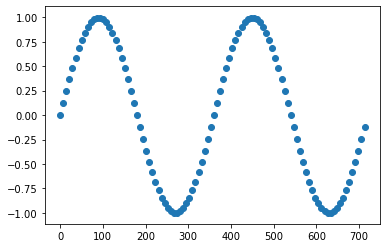

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import math

def sin_data(loop=2, dot=100):
    x = np.arange(0, 360*loop, round(360*loop/dot, 1))
    y = np.array([math.sin(math.radians(y)) for y in x])
    return x, y

x, y = sin_data(2, 100)
plt.scatter(x, y)

スコア 0.1515970931855054


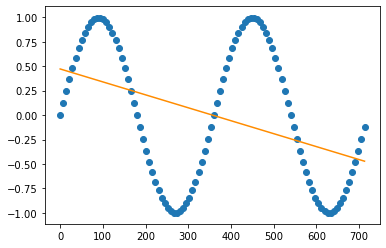

In [10]:
# 線形回帰で予測してみる
from sklearn.linear_model import LinearRegression

lin_x = x.reshape(-1,1)
lin_y = y.reshape(-1,1)
model = LinearRegression()
model.fit(lin_x, lin_y)

plt.scatter(x, y)
plt.plot(x, model.predict(lin_x), color='darkorange', marker='', linestyle='-',)
print("スコア", model.score(lin_x, lin_y))

No handles with labels found to put in legend.


スコア 0.9999999600159952


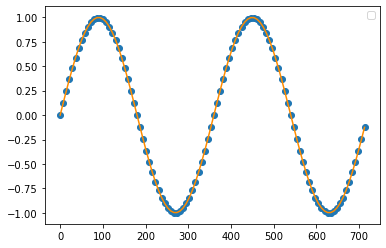

In [11]:
# 非線形回帰で予測してみる
from sklearn.kernel_ridge import KernelRidge

model2 = KernelRidge(alpha=0.0002, kernel='rbf')
model2.fit(lin_x, lin_y)

plt.legend()
plt.scatter(x, y)
plt.plot(x, model2.predict(lin_x), color='darkorange', marker='', linestyle='-',)
print("スコア", model2.score(lin_x, lin_y))

No handles with labels found to put in legend.


スコア 0.5555507370208744


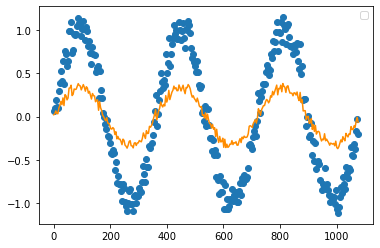

In [38]:
# 非線形回帰で予測してみる(乱数込み)
from sklearn.kernel_ridge import KernelRidge

def sin_data_rand(loop=2, dot=100, rand=0.1):
    x = np.arange(0, 360*loop, round(360*loop/dot, 1))
    y = np.array([math.sin(math.radians(y))+rand*np.random.randn() for y in x])
    return x, y

x2, y2 = sin_data_rand(3, 300, 0.1)
lin_x2 = x2.reshape(-1,1)
lin_y2 = y2.reshape(-1,1)
model3 = KernelRidge(alpha=2, kernel='rbf')
model3.fit(lin_x2, lin_y2)

plt.legend()
plt.scatter(x2, y2)
plt.plot(x2, model3.predict(lin_x2), color='darkorange', marker='', linestyle='-',)
print("スコア", model3.score(lin_x2, lin_y2))